In [14]:
import pandas as pd
import csv
import sqlalchemy as sqAl
from sqlalchemy import create_engine




psql_username = 'postgres'
from config import psql_password 
database_name = 'postgres'
host = 'illinoiseducation.cseojgcrzzgi.us-east-1.rds.amazonaws.com'

connection_string = f'postgresql://{psql_username}:{psql_password}@{host}:5432/{database_name}'

engine = create_engine(connection_string)

In [15]:
regression_df = pd.read_sql("select * from test_scores", engine)
regression_df['ELA'] = pd.to_numeric(regression_df['ELA'])
regression_df['Math'] = pd.to_numeric(regression_df['Math'])
regression_df = regression_df.astype({'ELA': int, 'Math': int})
regression_df.head(2)

,RCDTS,County,Dist #,District Name/ School Name,City,ELA,Math
0,010010010260001,Adams,10,Seymour High School,Payson,524,489
1,010010020260001,Adams,20,Liberty High School,Liberty,500,485


In [16]:
general_df = pd.read_sql("select * from high_school", engine)
general_df.head(2)

,RCDTS,Type,District,School Type,City,County,District Type,District Size,Student Enrollment - Total,Student Enrollment - Low Income %,...,Teacher Retention Rate,# of 12 graders who took advanced Courses,Avg Number of days of Physical Education Per Week Per Student,Community College Remediation %,Avg Class Size - High School,Chronic Absenteeism,Number of students who took AP Exams Grade 10,Number of students who passed AP Exams Grade 12,Chronic Absenteeism - Low Income,Low Income Count
0,010010010260001,School,Payson CUSD 1,HIGH SCHOOL,Payson,Adams,UNIT,MEDIUM,246.0,43.9,...,90.6,NaN,5.0,37.5,13.0,12.0,NaN,NaN,21.6,107.994
1,010010020260001,School,Liberty CUSD 2,HIGH SCHOOL,Liberty,Adams,UNIT,MEDIUM,281.0,22.4,...,84.8,23.0,3.0,20.0,22.0,2.5,NaN,NaN,7.8,62.944


In [17]:
gen_df = general_df.filter(['RCDTS',
                            'Teacher Retention Rate',
                            '# of 12 graders who took advanced Courses',
                            'Avg Number of days of Physical Education Per Week Per Student',
                            'Community College Remediation %',
                            'Avg Class Size – All Grades',
                            'Chronic Absenteeism',
                            'Chronic Absenteeism - Low Income'                            
                           ], axis = 1)
gen_df.rename(columns = {'Teacher Retention Rate':'TeachRetRate'}, inplace = True)
gen_df.rename(columns = {'# of 12 graders who took advanced Courses':'advCourses'}, inplace = True)
gen_df.rename(columns = {'Avg Number of days of Physical Education Per Week Per Student':'PhyEd'}, inplace = True)
gen_df.rename(columns = {'Community College Remediation %':'ComCollege'}, inplace = True)
gen_df.rename(columns = {'Avg Class Size – All Grades':'ClassSize'}, inplace = True)
gen_df.rename(columns = {'Chronic Absenteeism':'ChronicAbsentee'}, inplace = True)
gen_df.rename(columns = {'Chronic Absenteeism - Low Income':'ChronicLowIncome'}, inplace = True)

gen_df

,RCDTS,TeachRetRate,advCourses,PhyEd,ComCollege,ClassSize,ChronicAbsentee,ChronicLowIncome
0,010010010260001,90.6,NaN,5.0,37.5,16.0,12.0,21.6
1,010010020260001,84.8,23.0,3.0,20.0,20.0,2.5,7.8
2,010010030260001,83.7,15.0,5.0,32.3,15.0,11.9,19.6
3,010010040260001,83.7,30.0,5.0,31.6,11.0,17.3,18.9
4,010011720220003,81.9,151.0,5.0,29.2,20.0,31.3,47.5
...,...,...,...,...,...,...,...,...
648,56099207U260001,75.5,54.0,4.0,42.6,16.0,8.0,14.0
649,56099209U260001,89.4,72.0,3.0,61.8,19.0,14.4,21.0
650,56099255U260001,83.8,85.0,4.0,41.0,22.0,8.3,1.3
651,56099365U260007,90.0,410.0,5.0,45.1,19.0,32.5,39.5


In [18]:
df = pd.merge(regression_df, gen_df, on = "RCDTS", how = "inner")
df = df.dropna()
df =df.drop(columns = ['RCDTS', 'County', 'Dist # ', 'District Name/ School Name', 'City'])
df

,ELA,Math,TeachRetRate,advCourses,PhyEd,ComCollege,ClassSize,ChronicAbsentee,ChronicLowIncome
1,500,485,84.8,23.0,3.0,20.0,20.0,2.5,7.8
2,490,488,83.7,15.0,5.0,32.3,15.0,11.9,19.6
3,505,485,83.7,30.0,5.0,31.6,11.0,17.3,18.9
4,489,473,81.9,151.0,5.0,29.2,20.0,31.3,47.5
5,523,493,70.0,37.0,5.0,21.4,12.0,12.6,14.3
...,...,...,...,...,...,...,...,...,...
631,514,493,75.5,54.0,4.0,42.6,16.0,8.0,14.0
632,482,460,89.4,72.0,3.0,61.8,19.0,14.4,21.0
633,480,484,83.8,85.0,4.0,41.0,22.0,8.3,1.3
634,490,490,90.0,410.0,5.0,45.1,19.0,32.5,39.5


In [19]:
X = df.drop(columns = ['ELA', 'Math'], axis = 1)
X.head(2)

,TeachRetRate,advCourses,PhyEd,ComCollege,ClassSize,ChronicAbsentee,ChronicLowIncome
1,84.8,23.0,3.0,20.0,20.0,2.5,7.8
2,83.7,15.0,5.0,32.3,15.0,11.9,19.6


In [20]:
y = df['Math']

In [21]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [22]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x_train,y_train)
print(LR.intercept_)

460.88191994781903


In [23]:
y_prediction =  LR.predict(x_test)
y_prediction


array([482.96681875, 524.35131802, 529.10164993, 500.31268591,
       423.14017339, 447.55433293, 450.09528285, 428.68207911,
       479.03610009, 526.53943005, 480.0197226 , 512.80654628,
       513.43220565, 565.19990825, 469.13717699, 478.02589127,
       522.95921486, 496.80037961, 487.46577894, 465.41894191,
       459.29564096, 498.58494461, 509.35907986, 494.56607665,
       487.65005277, 483.53358962, 466.69673607, 471.03619773,
       500.02616748, 456.2456063 , 506.42057893, 508.19413133,
       505.69064825, 481.33397574, 487.96196252, 476.69881775,
       456.97330715, 509.72995222, 397.42369097, 483.07608891,
       496.99901778, 467.51692589, 478.60321007, 508.13450894,
       395.36523581, 454.0329921 , 476.24209387, 480.86779377,
       509.1941447 , 482.65302629, 456.815939  , 477.14698894,
       426.75664409, 507.94887185, 440.56466212, 520.60589018,
       507.00362695, 474.9399713 , 517.42036282, 487.79950099,
       471.92094741, 545.95486961, 573.87531138, 487.40

r2 score is  0.4946740665430944
mean_sqrd_error is== 1001.9100261895934
root_mean_squared error of is== 31.652962360410967


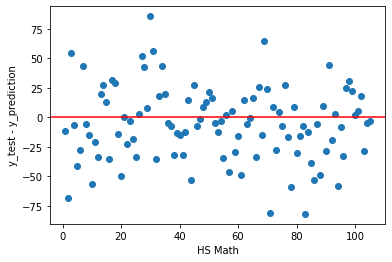

In [24]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

my_length = []
i = 1
while i <= len(y_test):
    my_length.append(i)
    i += 1

plt.scatter(my_length, (y_test - y_prediction))
plt.ylabel('y_test - y_prediction')
plt.xlabel('HS Math')
plt.axhline(y = 0, c = "red")
plt.savefig('R2_Graphs/HS_Math.png', dpi = 100, bbox_inches = 'tight')
plt.show()

486.91708067167764
r2 score is  0.5128515087685908
mean_sqrd_error is== 710.302532553994
root_mean_squared error of is== 26.6515015065567


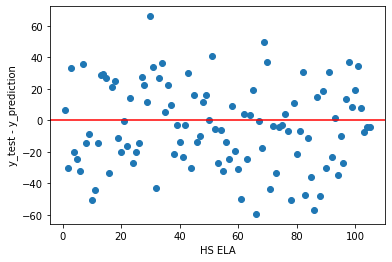

In [25]:
y = df['ELA']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x_train,y_train)
print(LR.intercept_)
y_prediction =  LR.predict(x_test)

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

my_length = []
i = 1
while i <= len(y_test):
    my_length.append(i)
    i += 1

plt.scatter(my_length, (y_test - y_prediction))
plt.ylabel('y_test - y_prediction')
plt.xlabel('HS ELA')
plt.axhline(y = 0, c = "red")
plt.savefig('R2_Graphs/HS_ELA.png', dpi = 100, bbox_inches = 'tight')
plt.show()

947.7990006194968
r2 score is  0.5174446696537767
mean_sqrd_error is== 3197.1934732263253
root_mean_squared error of is== 56.54373062706709


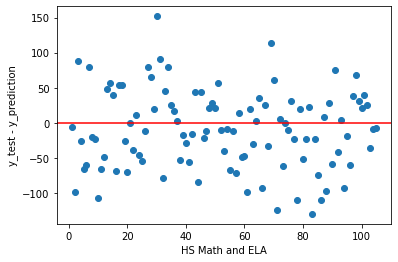

In [26]:
df['ELA/Math Sum'] = df['ELA'] +  df['Math']
y = df['ELA/Math Sum']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x_train,y_train)
print(LR.intercept_)
y_prediction =  LR.predict(x_test)

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

my_length = []
i = 1
while i <= len(y_test):
    my_length.append(i)
    i += 1

plt.scatter(my_length, (y_test - y_prediction))
plt.ylabel('y_test - y_prediction')
plt.xlabel('HS Math and ELA')
plt.axhline(y = 0, c = "red")
plt.savefig('R2_Graphs/HS_Both.png', dpi = 100, bbox_inches = 'tight')
plt.show()